In [284]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from scipy import ndimage
%matplotlib inline

In [312]:
for x in glob.glob('./Img/*.JPG'):
    img = plt.imread(x)
    print(x)
    break    

./Img\DSC01517.JPG


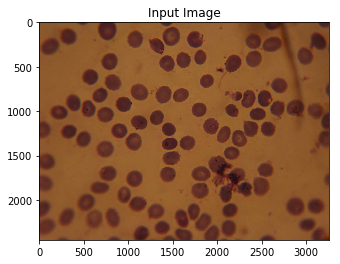

In [313]:
I = img # this variable will be used later
plt.figure()
plt.title('Input Image')
plt.imshow(img)

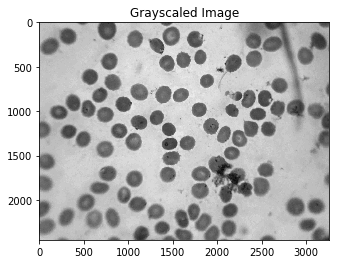

In [314]:
I2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title('Grayscaled Image')
plt.imshow(I2, cmap = 'gray')

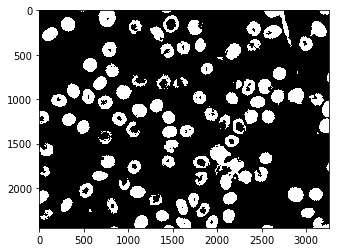

In [315]:
ret, thresh1 = cv2.threshold(I2,50,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh1, cmap = 'gray')

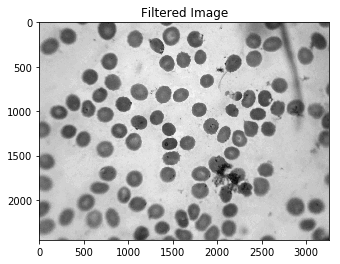

In [316]:
I3 = cv2.medianBlur(I2, 3)
plt.title('Filtered Image')
plt.imshow(I3, cmap = 'gray')

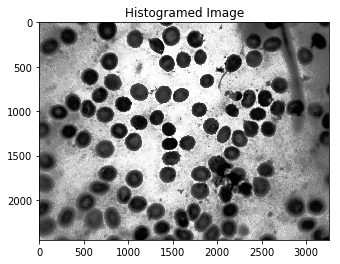

In [317]:
I31 = cv2.equalizeHist(I3)
plt.title('Histogramed Image')
plt.imshow(I31, cmap = 'gray')

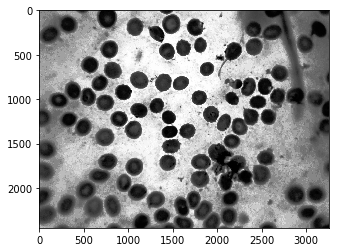

In [318]:
plt.imshow(cv2.GaussianBlur(I31, (5, 5), 0), cmap = 'gray')

In [319]:
bluecells = I[:, :, 2] - 0.5*I[:, :, 0] - 0.5*I[:, :, 1]
m, n = np.shape(bluecells)
temp = np.zeros((m, n))
for i in range(0,m):
    for j in range(0,m):
        if (bluecells[i,j] > 0):
            temp[i,j] = 1
plt.title('Seperation')
plt.imshow(bluecells, cmap = 'gray')

In [320]:
# normalize bluecells
bluecells = (bluecells - np.min(bluecells))/(np.max(bluecells) - np.min(bluecells))
plt.imshow(bluecells, cmap = 'gray')

In [321]:
Blue = bluecells > 0.62
Blue = (Blue*1*255).astype(np.uint8)
#Blue = cv2.medianBlur(Blue*1, 3)
#Blue = cv2.morphologyEx((Blue*1).astype(np.uint8), cv2.MORPH_OPEN, kernel)
kernel = np.ones((4,4),np.uint8)
Blue = cv2.erode(Blue, kernel,iterations = 4)
Blue = cv2.dilate(Blue,kernel,iterations = 4)
plt.title('RBC and Infected Cells')
plt.imshow(Blue, cmap = 'gray')

In [296]:
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 0
params.maxThreshold = 255   
params.filterByArea = True
params.minArea = 2000
params.maxArea = 10000000   
params.filterByCircularity = False
params.filterByInertia = False
params.filterByConvexity = False
params.filterByColor = True
params.blobColor = 255

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(Blue)

I_copy = I

im_with_keypoints = cv2.drawKeypoints(I_copy, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

infected = len(keypoints)
print("Infected RBC = ", infected)
plt.figure(figsize = (45,45))
plt.imshow(im_with_keypoints, interpolation='nearest')

Infected RBC =  9


In [297]:
#kernel = np.ones((3,3),np.uint8)
#Blue = cv2.erode((Blue*1).astype(np.uint8),kernel,iterations = 5)
#NRem = cv2.dilate(Blue,kernel,iterations = 5)
##NRem = ndimage.binary_opening(Blue, iterations = 8)
#plt.title('Noise Removal')
#plt.imshow(NRem, cmap = 'gray')

In [298]:
## Add Intensity Adjustment here ("imadjust" is the function in matlab)

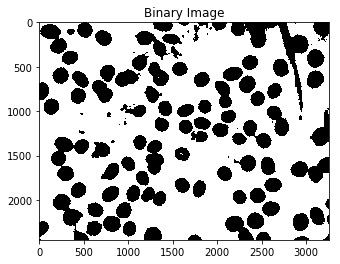

In [299]:
#applied threshold on I31 here instead of I2
ret2, I6 = cv2.threshold(I3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.title('Binary Image')
plt.imshow(I6, cmap = 'gray')

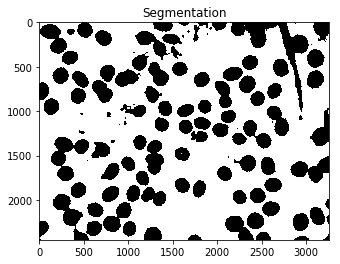

In [300]:
#I7 = ndimage.binary_closing(I6, iterations = 15)
kernel = np.ones((3,3),np.uint8)
Blue = cv2.erode(I6, kernel,iterations = 5)
I7 = cv2.dilate(Blue,kernel,iterations = 5)
plt.title('Segmentation')
plt.imshow(I7, cmap = 'gray')

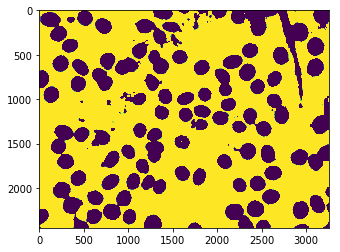

In [301]:
I7 = cv2.GaussianBlur(I7, (3,3), 0)
plt.imshow(I7)

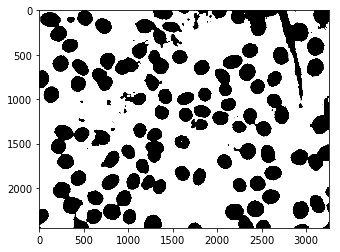

In [302]:
plt.imshow(I7, cmap='gray')

In [303]:
des = cv2.bitwise_not(I7)
im2,contour,hier = cv2.findContours(des,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    cv2.drawContours(des,[cnt],0,255,-1)

I7 = cv2.bitwise_not(des)
plt.imshow(I7,cmap = 'gray')

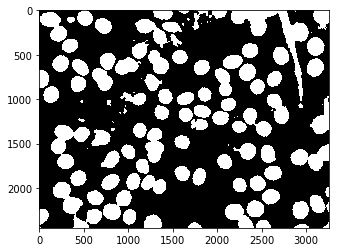

In [304]:
I7 = 255-I7
plt.imshow(I7, cmap = 'gray')

RBC count =  75


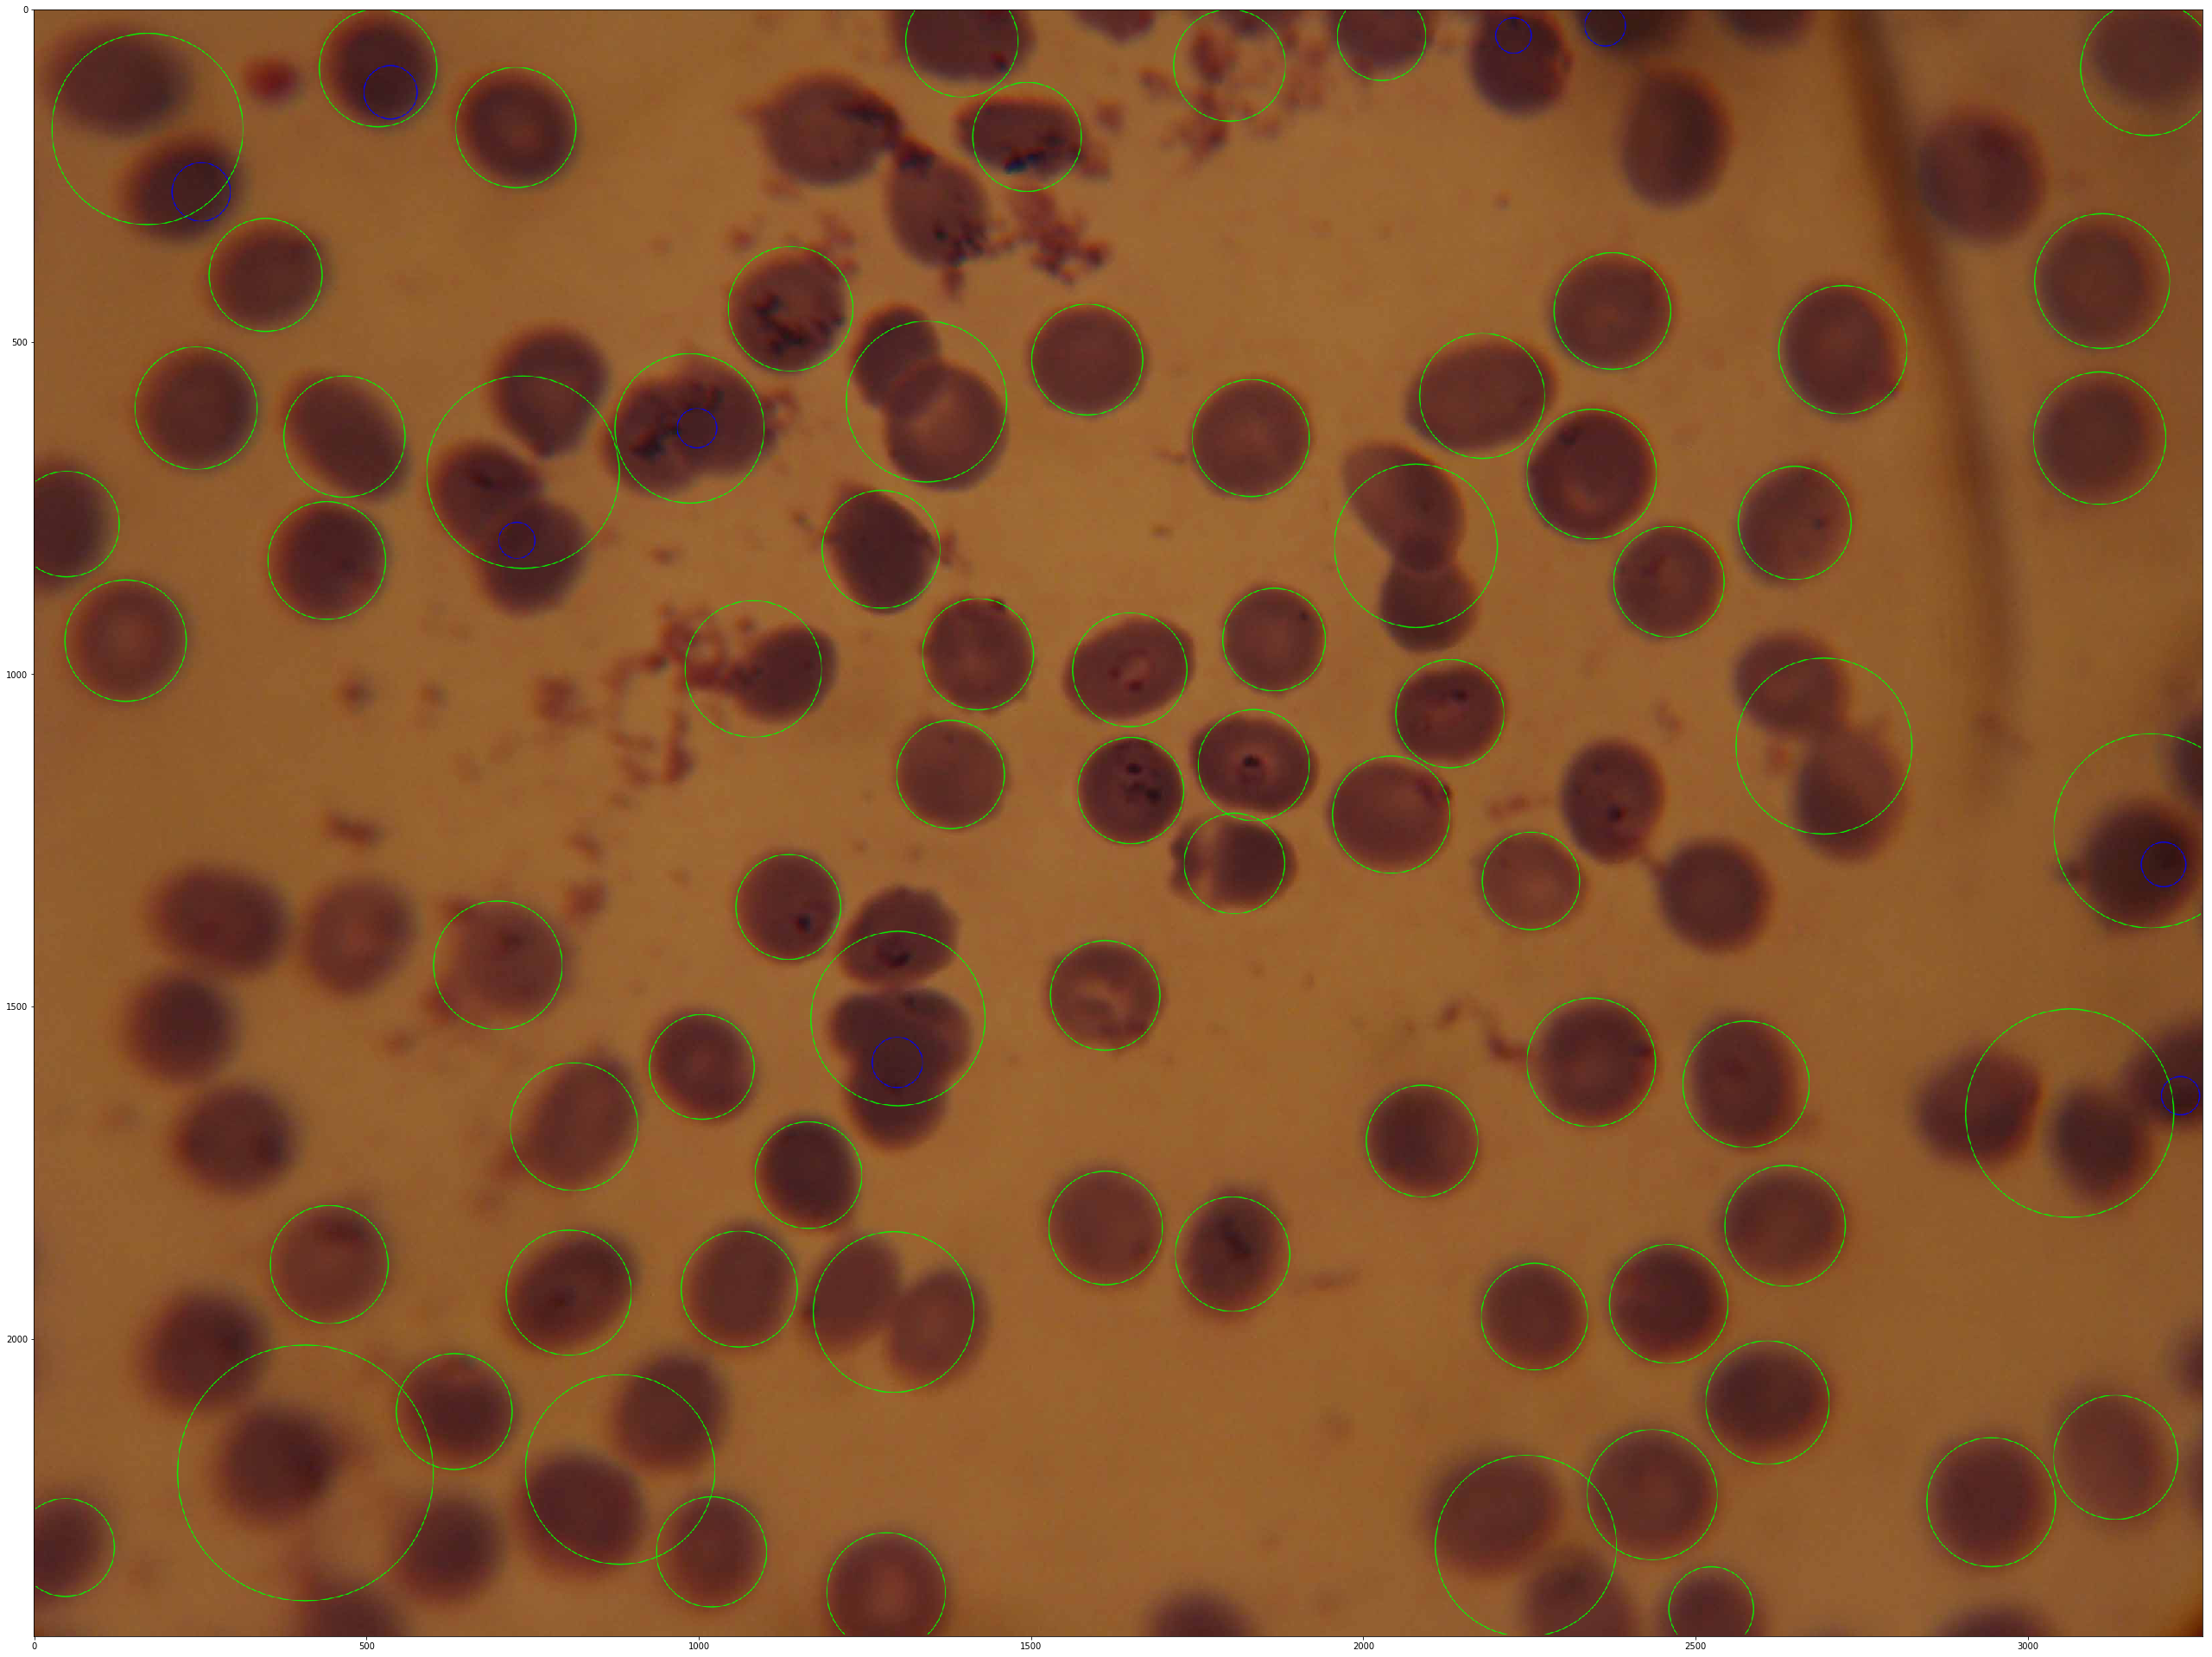

In [305]:
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 0
params.maxThreshold = 255   
params.filterByArea = True
params.minArea = 10000
params.maxArea = 1000000    
params.filterByCircularity = False
params.filterByInertia = True
params.filterByConvexity = False
params.filterByColor = True
params.blobColor = 255

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(I7)

im_with_keypoints = cv2.drawKeypoints(im_with_keypoints, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

rbc_count = len(keypoints)
print("RBC count = ", rbc_count)
plt.figure(figsize = (45,45))
plt.imshow(im_with_keypoints, interpolation='nearest')
plt.imsave('image1.jpg', im_with_keypoints)

In [227]:
healthy_rbc = rbc_count - infected
print(healthy_rbc)

79


# ENDDD
## HERE "im_with_keypoints" is final image
## "healthy_rbc" is the number of Healthy RBC
## "infected" is the number of infected RBC

In [ ]:
im = np.ones((256, 1024))*255
cv2.imshow('im', im)
cv2.waitKey() & .


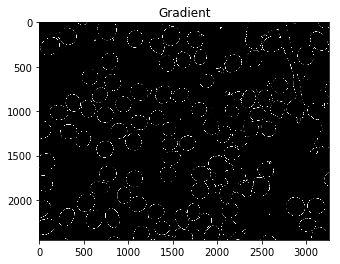

In [93]:
#seg = cv2.Canny((I2).astype(np.uint8), 30, 30)
#seg = cv2.Laplacian(I2,cv2.CV_64F)
xgrad = np.absolute(cv2.Sobel(I7,cv2.CV_64F,1,0,ksize=5))
ygrad = np.absolute(cv2.Sobel(I7,cv2.CV_64F,0,1,ksize=5))
seg = np.sqrt(xgrad*xgrad + ygrad*ygrad)
row, col = seg.shape
seg[ seg < 175] = 0
#seg[ seg > 175] = 255
#seg = cv2.equalizeHist(seg.astype(np.uint8))
plt.title('Gradient')
plt.imshow(seg, cmap = 'gray')

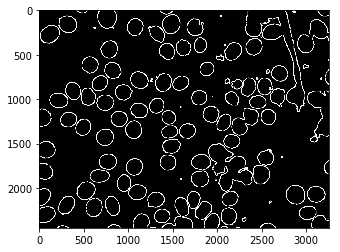

In [94]:
kernel = np.ones((3,3),np.uint8)
segdil = cv2.dilate(seg,kernel,iterations = 3)
#segdil = cv2.(seg,kernel,iterations = 4)
#kernel = np.ones((3,3),np.uint8)
#segdil = cv2.erode(segdil,kernel,iterations = 6)
#segdil = cv2.dilate(segdil,kernel,iterations = 6)
plt.imshow(segdil, cmap = 'gray')

In [27]:
np.unique(segdil)

array([   0.        ,  175.00285712,  175.0257124 , ...,  874.34546948,
        875.50214163,  881.2831554 ])

In [25]:
plt.imshow(cv2.medianBlur(segdil, 3))

error: C:\bld\opencv_1506447021968\work\opencv-3.3.0\modules\imgproc\src\smooth.cpp:3529: error: (-210)  in function cv::medianBlur


In [18]:
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = segdil.shape
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(segdil, mask, (0,0), 255);

error: /build/opencv-2TNgni/opencv-3.1.0+dfsg1/modules/imgproc/src/floodfill.cpp:585: error: (-210)  in function floodFill
